### Carregando Dataset

In [58]:
import pandas as pd

work_directory = "../../combustiveis/"
dataset_name = "dataset_etanol_sp.csv"

df = pd.read_csv(work_directory + dataset_name, sep=",", decimal=".", encoding="cp860", index_col=False)

print("Dataset carregado. Quantidade de registros: " + str(len(df.index)))

Dataset carregado. Quantidade de registros: 2032002


In [2]:
df = df.dropna()

In [3]:
df = df[["Valor de Venda", "Valor de Compra"]]

In [4]:
df

,Valor de Venda,Valor de Compra
6,3.099,2.6887
14,2.997,2.7501
15,3.097,2.7555
30,3.079,2.6946
62,2.949,2.6726
...,...,...
2031909,1.979,1.7599
2031918,2.199,1.9351
2031950,2.299,2.0434
2031981,2.199,1.9000


### Visualizando Correlações

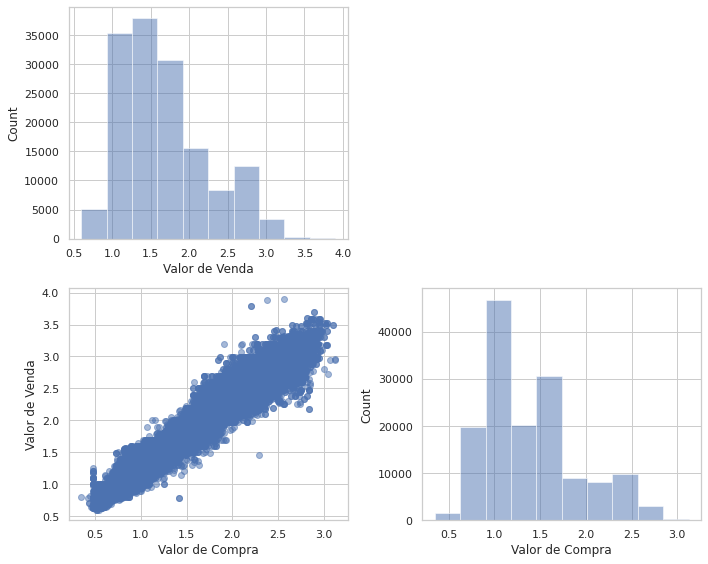

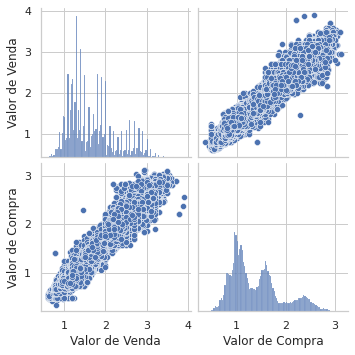

<AxesSubplot:>

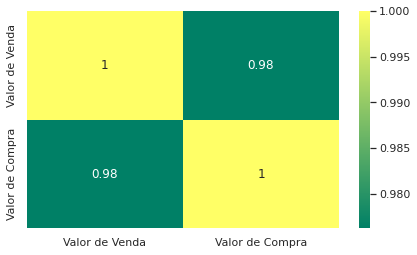

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns

# Scatter
scatterplotmatrix(df.values, figsize=(10, 8), names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

# Pair Plot
sns.set(style='whitegrid', context='notebook')
cols = df.columns
sns.pairplot(df, height=2.5)
plt.show()

# Heat Map
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),annot=True,cmap='summer')

### Realizando Regressão Linear

In [44]:
from   sklearn.linear_model import LinearRegression

X = df[["Valor de Compra"]].values
Y = df["Valor de Venda"].values

reg = LinearRegression()
reg.fit(X, y)


LinearRegression()

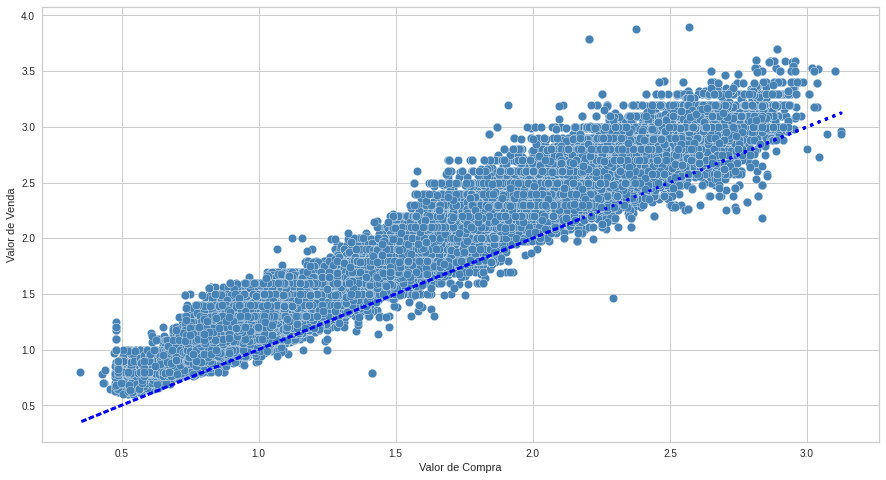

In [53]:
f_previsaoes = reg.predict(X)

plt.figure(figsize = (15,8))
plt.scatter(df['Valor de Compra'], df['Valor de Venda'], c='steelblue', edgecolor='white', s=70)

plt.plot(df['Valor de Compra'],f_previsaoes, c='blue',linewidth=3, linestyle=':')

plt.xlabel("Valor de Compra")
plt.ylabel("Valor de Venda")
plt.show()



### Regressão Linear Conforme Modelo do Professor

In [54]:
X = df[["Valor de Compra"]].values
Y = df["Valor de Venda"].values

In [39]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(Y[:,np.newaxis]).flatten()

In [40]:
lr = LinearRegression()
lr.fit(x_std, y_std)

LinearRegression()

In [41]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

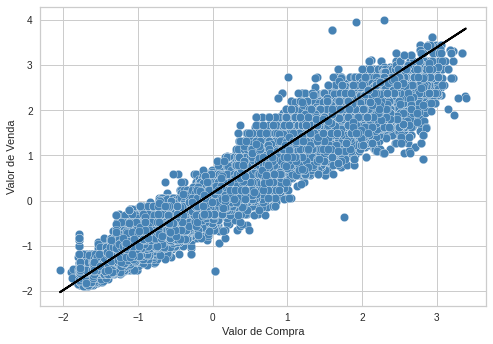

In [43]:
lin_regplot(x_std, y_std, lr)
plt.xlabel('Valor de Compra')
plt.ylabel('Valor de Venda')
plt.show()